In [90]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
# Importing prepared dataset
import pickle
input = open('data_klast.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]


In [73]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [74]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(4, activation = 'relu', input_dim = 4))

# Adding the output layer
cnn.add(Dense(2, activation = 'sigmoid'))

# Adding the output layer
cnn.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [75]:
import sys
sys.setrecursionlimit(10000)

In [76]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 64, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
28/28 [==============================] - 0s 5ms/step - loss: 0.5768 - accuracy: 0.7204 - val_loss: 0.5365 - val_accuracy: 0.7589
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7204 - val_loss: 0.5329 - val_accuracy: 0.7589
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.7204 - val_loss: 0.5291 - val_accuracy: 0.7589
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7204 - val_loss: 0.5249 - val_accuracy: 0.7589
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7204 - val_loss: 0.5203 - val_accuracy: 0.7589
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7204 - val_loss: 0.5150 - val_accuracy: 0.7589
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.7204 - val_loss: 0.5108 - val_accuracy: 0.7589
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7723 - val_loss: 0.4566 - val_accuracy: 0.8013
Epoch 60/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7712 - val_loss: 0.4561 - val_accuracy: 0.8013
Epoch 61/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7712 - val_loss: 0.4560 - val_accuracy: 0.8013
Epoch 62/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7695 - val_loss: 0.4561 - val_accuracy: 0.8013
Epoch 63/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7695 - val_loss: 0.4563 - val_accuracy: 0.8013
Epoch 64/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7679 - val_loss: 0.4555 - val_accuracy: 0.8013
Epoch 65/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7684 - val_loss: 0.4553 - val_accuracy: 0.7991
Epoch 

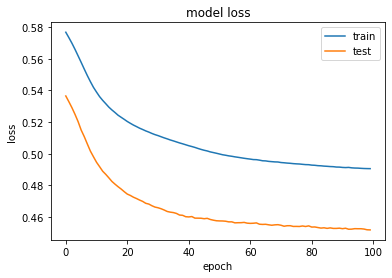

In [77]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [70]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[301  39]
 [ 51  57]]


Проанализировав матрицу, можем сказать, что неверно распознанных элементов 90. Точность модели = 80% Специфичность = 88.5% Чувствительность = 53%. Не сказать, что сильно отличается от предыдущей модели по рузельтатам.